In [ ]:
# importing liberaries
import tensorflow as tf
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select some images to plot (e.g., the first 10 images)

In [ ]:

images_to_plot = x_train[:10]
labels_to_plot = y_train[:10]

# Plot and show the selected images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images_to_plot[i])
    ax.set_title(f"Label: {labels_to_plot[i][0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#importing cifar data set from tensorflow.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')                 # converting all the images to pixels
x_test_flat = x_test_flat.astype('float32')

x_train_flat /= 255.0
x_test_flat /= 255.0


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

 # defining all the **classifiers**

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_flat, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train_flat, y_train)


lr_classifier = LogisticRegression()
lr_classifier.fit(x_train_flat, y_train)


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_flat, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [ ]:
classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Logistic Regression" : lr_classifier,
    "KNN (k=5)": knn_classifier
}

printing the accuracy , precision , Recall and F1 score

In [ ]:
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(x_test_flat)
    accuracy = clf.score(x_test_flat, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(clf_name + ":\n")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")

Decision Tree:

Accuracy: 0.2659
Precision: 0.26565284101280917
Recall: 0.2659
F1 Score: 0.26556622315371614


Random Forest:

Accuracy: 0.4655
Precision: 0.46167989985676366
Recall: 0.4655
F1 Score: 0.4623343173652625


Logistic Regression:

Accuracy: 0.4051
Precision: 0.40039009393010094
Recall: 0.4051
F1 Score: 0.4008864801455599


KNN (k=5):

Accuracy: 0.3398
Precision: 0.43042618255284965
Recall: 0.3398
F1 Score: 0.3260170986061005




# printing the confusion matrix for all the models

Decision Tree:

Accuracy: 0.2679
Confusion Matrix:
[[345  89  92  52  73  48  40  46 148  67]
 [ 78 272  70  78  58  49  59  65 108 163]
 [102  45 208  80 149 113 115  97  45  46]
 [ 62  62 115 174 116 138 131  85  52  65]
 [ 59  50 151  91 241 104 122  96  36  50]
 [ 54  66 112 155  95 217 100  89  58  54]
 [ 37  56 122 128 137 101 278  69  26  46]
 [ 78  80  84  82  93  90  74 283  56  80]
 [148 105  47  48  51  50  24  50 380  97]
 [ 76 169  54  59  53  56  58  87 107 281]]




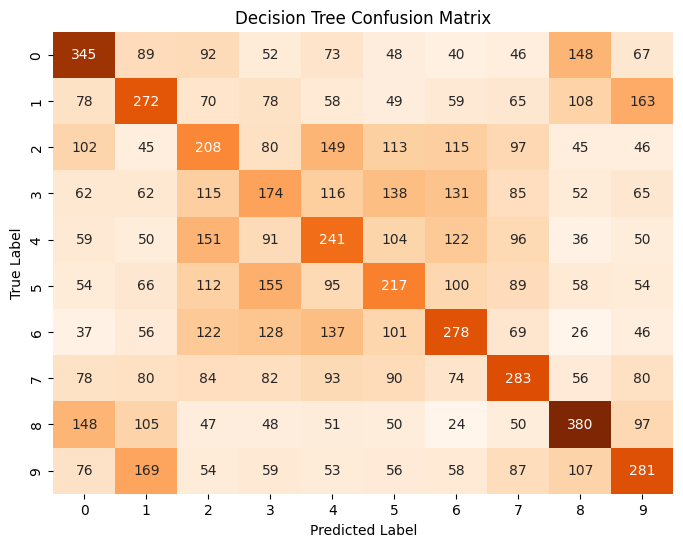

Random Forest:

Accuracy: 0.4667
Confusion Matrix:
[[564  37  69  14  27  27  18  26 159  59]
 [ 28 537  20  32  21  31  43  37  67 184]
 [103  44 328  82 151  64 114  59  27  28]
 [ 51  50  79 274  66 186 141  53  22  78]
 [ 57  19 153  61 399  42 142  83  23  21]
 [ 33  36  85 149  94 393  80  67  29  34]
 [ 14  33  90  63 113  51 557  26  11  42]
 [ 45  41  47  55 102  87  46 450  22 105]
 [ 90  81  21  22  23  30  13  17 618  85]
 [ 47 183  14  37  19  15  22  37  79 547]]




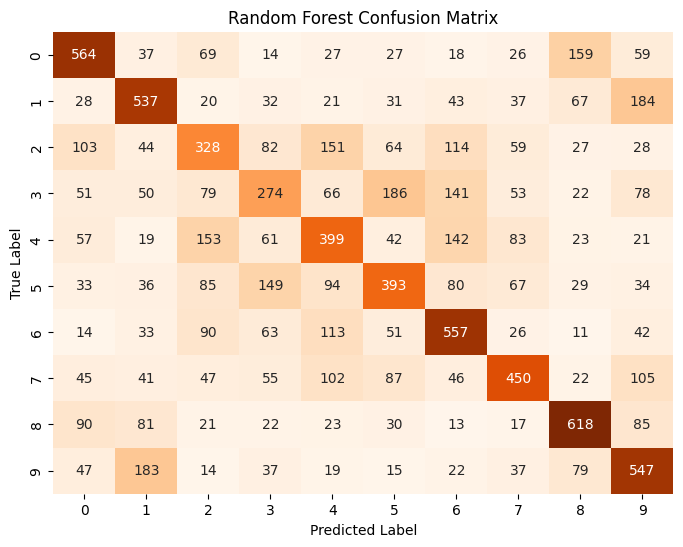

Logistic Regression:

Accuracy: 0.4051
Confusion Matrix:
[[479  42  59  30  19  38  26  53 184  70]
 [ 60 494  21  28  22  41  37  53  78 166]
 [112  47 276  80 115  93 138  67  48  24]
 [ 42  60  96 235  56 218 127  48  45  73]
 [ 57  28 135  47 291 106 158 121  32  25]
 [ 42  44  91 136  81 372  88  72  41  33]
 [ 15  34  73 107  98  95 489  39  23  27]
 [ 49  44  72  48  90  85  48 444  42  78]
 [184  67  20  20   9  53   8  19 515 105]
 [ 83 190  20  20  17  31  41  48  94 456]]




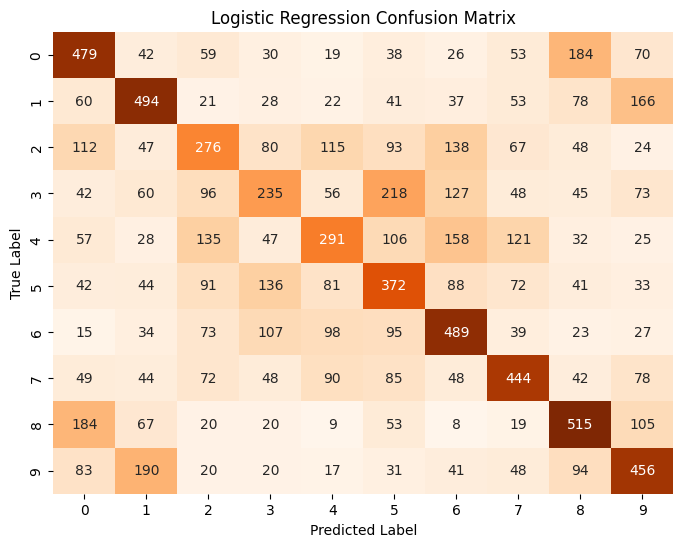

KNN (k=5):

Accuracy: 0.3398
Confusion Matrix:
[[537   4 117  13  59   7  26   5 225   7]
 [139 205 110  42 155  36  61  10 217  25]
 [107   3 452  52 226  34  66   8  49   3]
 [ 70   8 234 217 193 115  95  17  46   5]
 [ 64   1 262  35 514  21  41   7  53   2]
 [ 71   3 227 155 187 220  66  14  51   6]
 [ 27   2 273  68 314  37 248   2  28   1]
 [ 93  10 181  50 280  52  53 210  67   4]
 [141  14  52  38  54  16  14   8 655   8]
 [153  67  98  68 124  23  46  29 252 140]]




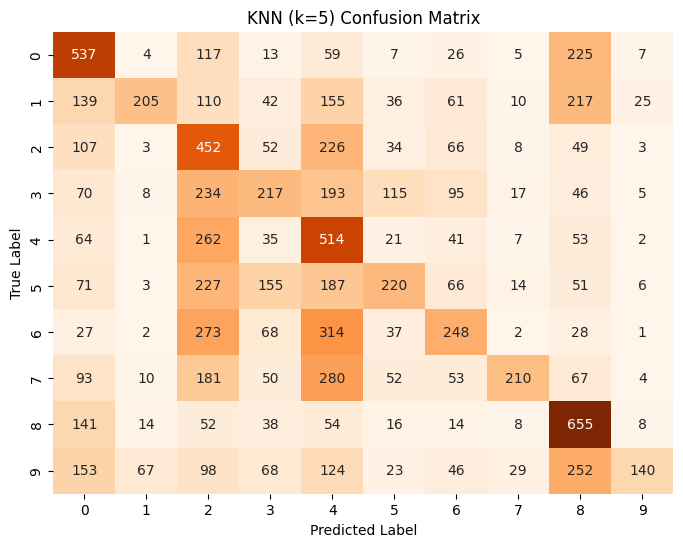

In [ ]:
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(x_test_flat)
    accuracy = clf.score(x_test_flat, y_test)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(clf_name + ":\n")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

20% validation set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


x_train_flat = x_train_flat.astype('float32')
x_val_flat = x_val_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')


x_train_flat /= 255.0
x_val_flat /= 255.0
x_test_flat /= 255.0

Decision Tree:

Validation Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 973    0    0    0    0    0    0    0    0    0]
 [   0  979    0    0    0    0    0    0    0    0]
 [   0    0 1030    0    0    0    0    0    0    0]
 [   0    0    0 1023    0    0    0    0    0    0]
 [   0    0    0    0  933    0    0    0    0    0]
 [   0    0    0    0    0 1015    0    0    0    0]
 [   0    0    0    0    0    0  996    0    0    0]
 [   0    0    0    0    0    0    0  994    0    0]
 [   0    0    0    0    0    0    0    0 1017    0]
 [   0    0    0    0    0    0    0    0    0 1040]]




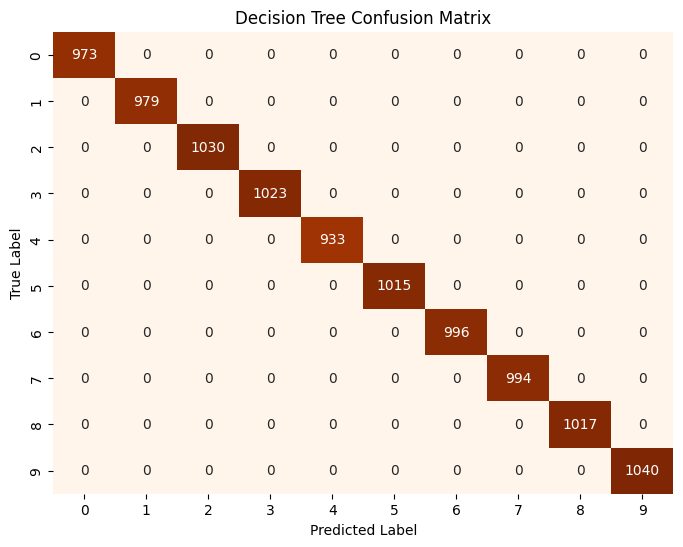

Random Forest:

Validation Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 973    0    0    0    0    0    0    0    0    0]
 [   0  979    0    0    0    0    0    0    0    0]
 [   0    0 1030    0    0    0    0    0    0    0]
 [   0    0    0 1023    0    0    0    0    0    0]
 [   0    0    0    0  933    0    0    0    0    0]
 [   0    0    0    0    0 1015    0    0    0    0]
 [   0    0    0    0    0    0  996    0    0    0]
 [   0    0    0    0    0    0    0  994    0    0]
 [   0    0    0    0    0    0    0    0 1017    0]
 [   0    0    0    0    0    0    0    0    0 1040]]




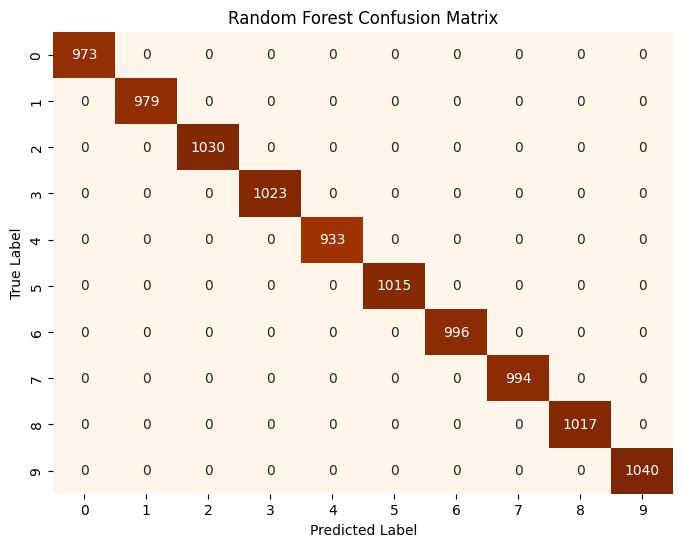

Logistic Regression:

Validation Accuracy: 0.4283
Precision: 0.42392330475453155
Recall: 0.42846964610590793
F1 Score: 0.4242806358188723
Confusion Matrix:
[[480  58  41  29  15  38  20  65 144  83]
 [ 49 535  23  24  21  33  44  44  63 143]
 [100  43 321  67 105  96 132  92  42  32]
 [ 48  64  96 271  61 215 126  49  44  49]
 [ 61  27 124  46 295  84 124 115  27  30]
 [ 29  56 105 151  75 362  94  77  35  31]
 [ 14  43  55  84  91  88 523  42  23  33]
 [ 50  30  77  49  92  83  44 456  34  79]
 [180  74  21  21   8  53  10  17 536  97]
 [ 87 171  14  16  14  40  48  51  95 504]]




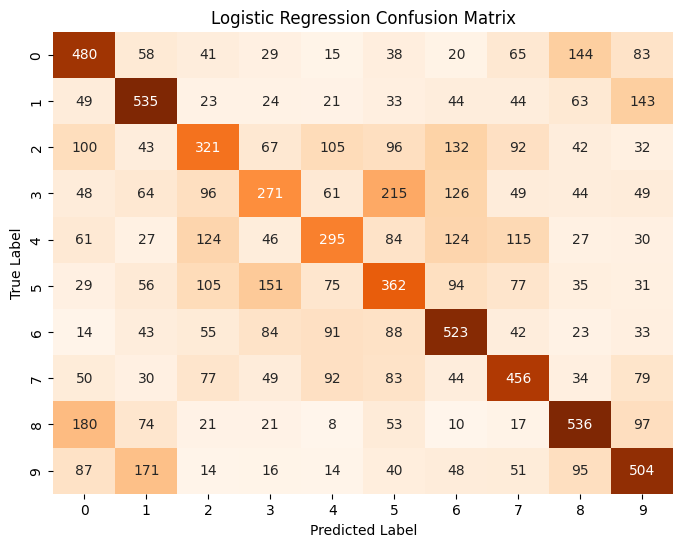

KNN (k=5):

Validation Accuracy: 0.5091
Precision: 0.6057408489203958
Recall: 0.5107899625761851
F1 Score: 0.5061563959048696
Confusion Matrix:
[[685   3  48   6  36  10  12   5 162   6]
 [120 421  53  24 137  17  54   5 136  12]
 [ 94   3 670  19 149  18  37   6  33   1]
 [ 61   7 183 470 127  60  73   2  38   2]
 [ 62   2 149  32 618  11  15   5  39   0]
 [ 58   4 186 115 169 402  41   8  32   0]
 [ 26   3 200  40 230  36 441   3  16   1]
 [ 70   4 155  49 236  38  51 343  43   5]
 [ 95   6  39  32  44  14  11   4 768   4]
 [142  47 101  47  98  27  45  24 236 273]]




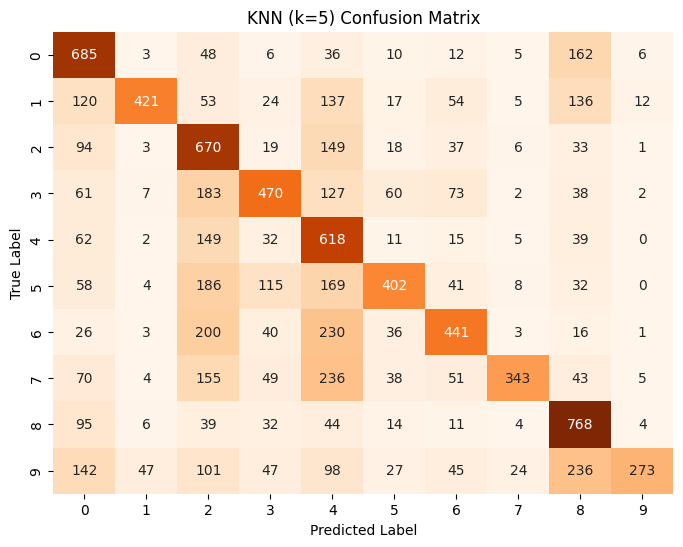

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
for clf_name, clf in classifiers.items():
    y_pred_val = clf.predict(x_val_flat)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average='macro')
    recall = recall_score(y_val, y_pred_val, average='macro')
    f1 = f1_score(y_val, y_pred_val, average='macro')
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(clf_name + ":\n")
    print("Validation Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(clf_name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

 3 fold cross validation on all the machine learning models

Decision Tree Cross-Validation Results:

Average Accuracy: 0.25562504781833584
Average Precision: 0.2566063597852928
Average Recall: 0.2555551238619393
Average F1 Score: 0.2559501764074648




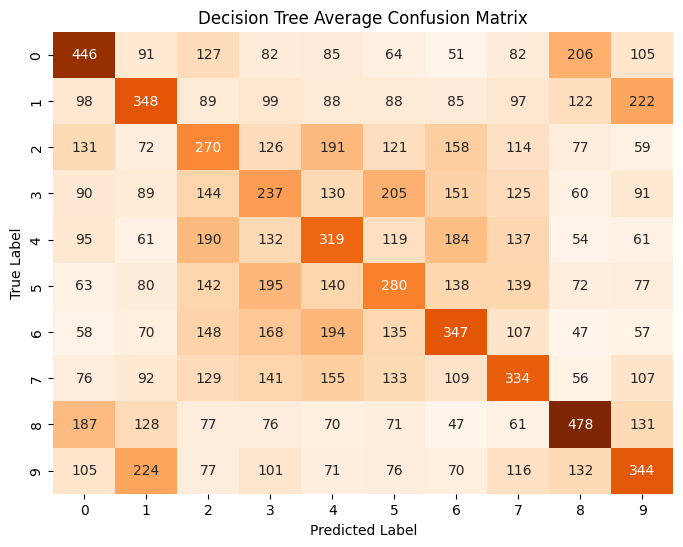

Random Forest Cross-Validation Results:

Average Accuracy: 0.44502506555464255
Average Precision: 0.44121012686174726
Average Recall: 0.4448910932510839
Average F1 Score: 0.44106217847018153




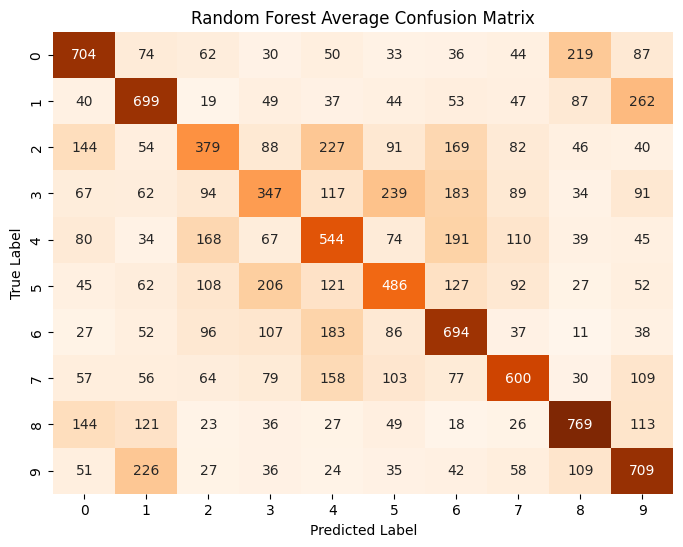

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Results:

Average Accuracy: 0.4012750461254407
Average Precision: 0.3961661419601363
Average Recall: 0.40121440170727246
Average F1 Score: 0.39737489106064805




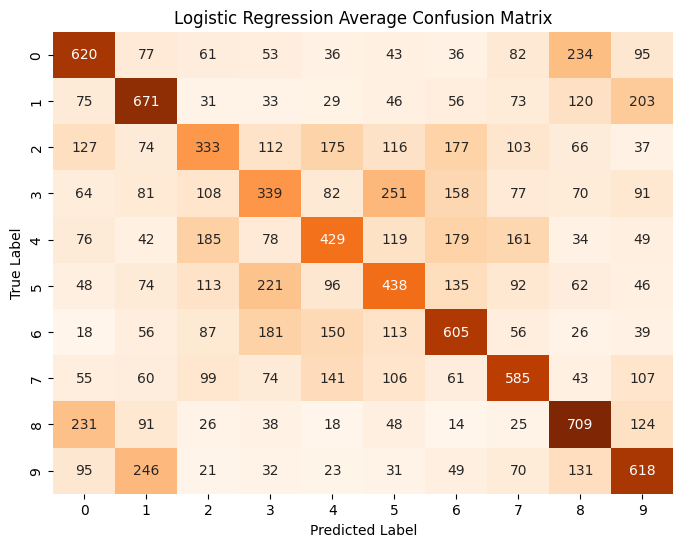

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.31785006977056834
Average Precision: 0.4089898149410997
Average Recall: 0.3174762751592632
Average F1 Score: 0.3013362620986158




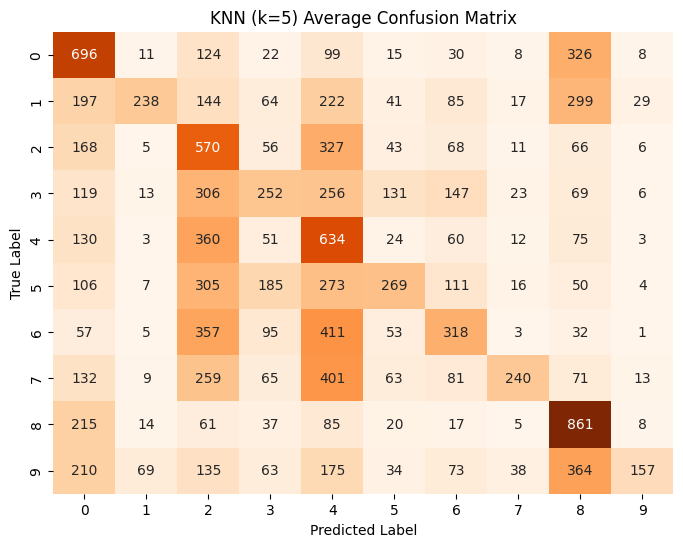

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []                                                                             # performing 3 fold cross validation on all the machine learning models
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

10 fold cross validation on all the ML models

Decision Tree Cross-Validation Results:

Average Accuracy: 0.2597
Average Precision: 0.2606671202205376
Average Recall: 0.25964808892906616
Average F1 Score: 0.25989563433225654




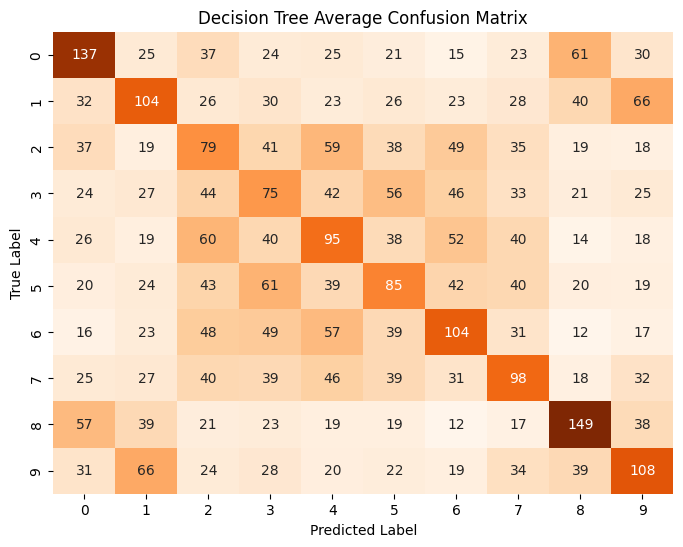

Random Forest Cross-Validation Results:

Average Accuracy: 0.4532
Average Precision: 0.4494827793481049
Average Recall: 0.4530518360645138
Average F1 Score: 0.4493495609356536




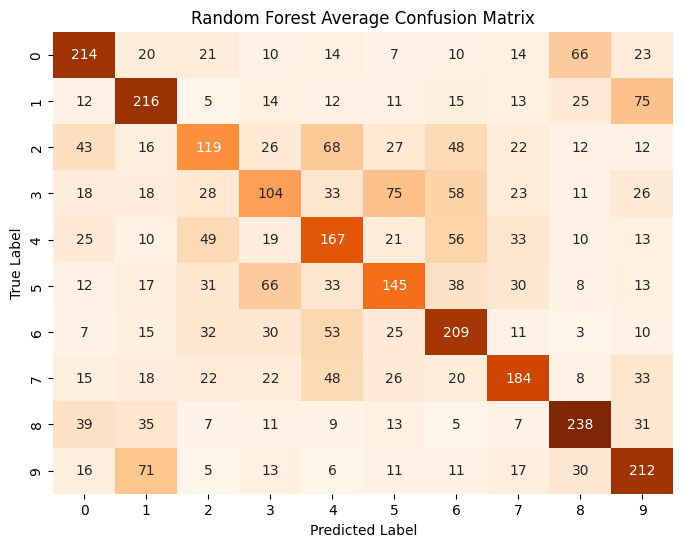

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Results:

Average Accuracy: 0.405525
Average Precision: 0.40064063133725086
Average Recall: 0.4054525799740884
Average F1 Score: 0.40148750669730493




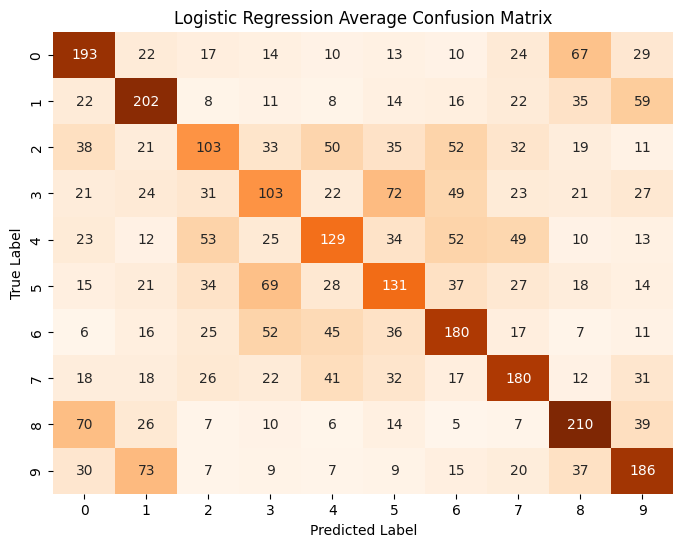

KNN (k=5) Cross-Validation Results:

Average Accuracy: 0.32782500000000003
Average Precision: 0.42266749280483795
Average Recall: 0.32745581315295536
Average F1 Score: 0.3124895239044365




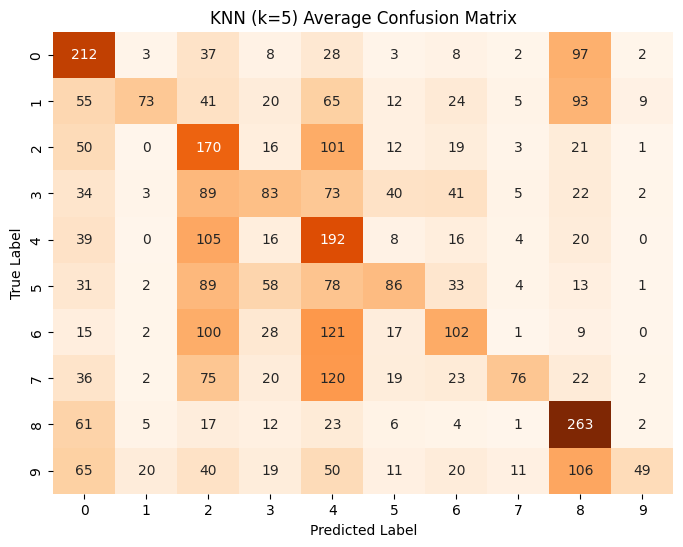

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    confusion_matrices = []

    for train_index, val_index in skf.split(x_train_flat, y_train):
        x_train_cv, x_val_cv = x_train_flat[train_index], x_train_flat[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        clf.fit(x_train_cv, y_train_cv)
        y_pred_cv = clf.predict(x_val_cv)

        accuracies.append(accuracy_score(y_val_cv, y_pred_cv))
        precisions.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
        recalls.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
        f1s.append(f1_score(y_val_cv, y_pred_cv, average='macro'))
        confusion_matrices.append(confusion_matrix(y_val_cv, y_pred_cv))

    print(clf_name + " Cross-Validation Results:\n")
    print("Average Accuracy:", np.mean(accuracies))
    print("Average Precision:", np.mean(precisions))
    print("Average Recall:", np.mean(recalls))
    print("Average F1 Score:", np.mean(f1s))
    print("\n")

    avg_confusion_mat = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_confusion_mat.astype(int), annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(clf_name + ' Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

 converting all the images of grey scale image before converting into pixels

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train Random Forest classifier
rf_classifier.fit(x_train_flat, y_train)

# Predict on the test set
y_pred_test = rf_classifier.predict(x_test_flat)                                   # choosing random forest since it was the best classifier for the colour images

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

In [ ]:
print("Random Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)

Random Forest Performance on Test Set:

Test Accuracy: 0.4185
Precision: 0.41543010627730126
Recall: 0.41850000000000004
F1 Score: 0.4159807957392327
Confusion Matrix:
[[473  29 102  20  54  25  37  39 167  54]
 [ 27 483  18  35  27  36  68  44  74 188]
 [ 95  43 328  85 133  76 116  55  42  27]
 [ 72  49  75 252  89 173 131  61  24  74]
 [ 58  32 149  59 357  55 122  92  43  33]
 [ 50  32 103 153  92 352  59  77  41  41]
 [ 33  57  97  78 119  51 467  28  19  51]
 [ 53  42  53  73 103  78  42 405  46 105]
 [ 85  70  31  27  28  58  20  40 554  87]
 [ 42 159  19  40  28  17  38  57  86 514]]


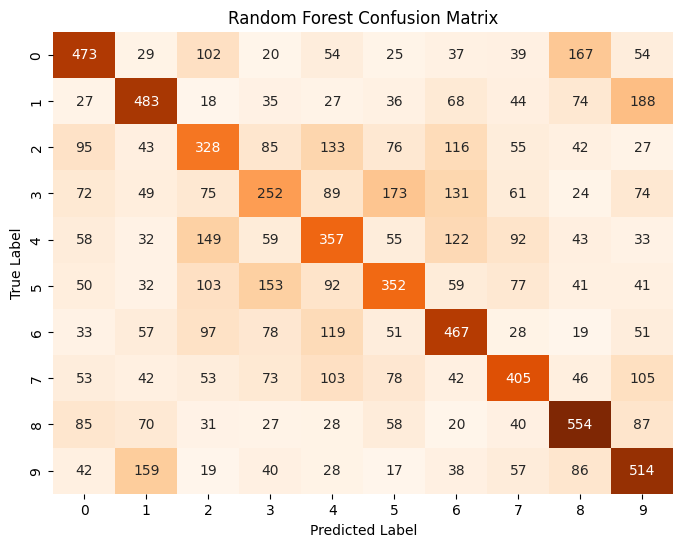

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 10 fold cross validation using random forest since it was the best using colour images

In [1]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)

                                                                                          # Performing 10 fold cross validation using random forest since it was the best using colour images
skf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)


accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

NameError: name 'x_train_flat' is not defined